In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
top2vec_plot_path = "/content/drive/MyDrive/Tesi/Plots/Top2Vec/top2vec_"
plot_path = "/content/drive/MyDrive/Tesi/Plots/Comparisons/comparisons_"

# Importing libraries

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.patches import Patch

import numpy as np
from math import log
import csv

from os import listdir
from os.path import isfile, join

# Plot results

## Different embeddings for Top2Vec results

### Initializing dictionaries of results

In [ ]:
# Tourpedia
# Test 1: {'num_topics': 14.0, 'diversity': 0.6646508527162551, 'irbo': 0.9248580358082984, 'c_npmi': -0.3392723909802706, 'c_uci': -10.056536471064778, 'c_umass': -12.516059682918238, 'c_v': 0.379202571898987}
# Test 2: {'num_topics': 10.4, 'diversity': 0.7504423419717537, 'irbo': 0.9288156296675032, 'c_npmi': -0.3417446746074659, 'c_uci': -10.11468118542824, 'c_umass': -12.148202390495069, 'c_v': 0.36091933308035257}
# Test 3: {'num_topics': 12.5, 'diversity': 0.71320497265892, 'irbo': 0.9304003475795326, 'c_npmi': -0.3399417248539535, 'c_uci': -10.079341668060895, 'c_umass': -12.081265859669452, 'c_v': 0.3555298552962292}
# Test 4: {'num_topics': 12.3, 'diversity': 0.6846377960275019, 'irbo': 0.9106581607350994, 'c_npmi': -0.34269620545276597, 'c_uci': -10.16429263023584, 'c_umass': -12.16444391412844, 'c_v': 0.36720958202546217}
# Test 5: {'num_topics': 50.6, 'diversity': 0.43127279744684294, 'irbo': 0.9076632542079567, 'c_npmi': -0.26074473164358536, 'c_uci': -8.02860455569444, 'c_umass': -9.385186098046553, 'c_v': 0.3579163859461168}
# Test 6: {'num_topics': 46.5, 'diversity': 0.5575727956399951, 'irbo': 0.9638680338482104, 'c_npmi': -0.2228302327630239, 'c_uci': -6.835665010150363, 'c_umass': -8.038410827137188, 'c_v': 0.35506224804263414}

In [ ]:
# Tourpedia deep-learn
#{'num_topics': 123.4, 'diversity': 0.28649124548294214, 'irbo': 0.9701924439751174, 'c_npmi': -0.2712415644313974, 'c_uci': -8.475234117271949, 'c_umass': -9.693998767110182, 'c_v': 0.3605059974423493}

In [ ]:
# Easytour deep-learn
#{'num_topics': 123.8, 'diversity': 0.28380105658599053, 'irbo': 0.9697045264941497, 'c_npmi': -0.2683759385708016, 'c_uci': -8.42199554359335, 'c_umass': -9.803253199524882, 'c_v': 0.3629542872232882}

In [ ]:
#Easytour speed=learn
doc_vec_chunk = {'num_topics': 41.5, 'diversity': 0.865787350177861, 'irbo': 0.9959754211984789, 'c_npmi': -0.1373683685997297, 'c_uci': -5.278008290149552, 'c_umass': -7.346481654847873, 'c_v': 0.5107702127978502}
doc_vec_no_chunk = {'num_topics': 50.7, 'diversity': 0.8315862370323801, 'irbo': 0.9949932208814929, 'c_npmi': -0.09789133017186936, 'c_uci': -4.493559342240369, 'c_umass': -5.202886553951696, 'c_v': 0.570103538736817}
test3 = {'num_topics': 41.9, 'diversity': 0.857653229530839, 'irbo': 0.9952818727994963, 'c_npmi': -0.12757823751725722, 'c_uci': -5.13572903976611, 'c_umass': -6.378286760702936, 'c_v': 0.5243180559056222}
test4 = {'num_topics': 48.9, 'diversity': 0.8391012828303197, 'irbo': 0.9949673000496653, 'c_npmi': -0.10066076245349853, 'c_uci': -4.542946713800365, 'c_umass': -5.458728659514632, 'c_v': 0.5621089896458603}
sentence_encoder = {'num_topics': 2.0, 'diversity': 1.0, 'irbo': 1.0, 'c_npmi': -0.2541045060224748, 'c_uci': -7.217034673229368, 'c_umass': -10.098948792556012, 'c_v': 0.4286507949183339}
distiluse = {'num_topics': 29.8, 'diversity': 0.7368369980667648, 'irbo': 0.9793781272692582, 'c_npmi': -0.2675844795100995, 'c_uci': -8.059502033645327, 'c_umass': -7.989346599207755, 'c_v': 0.35477216072877116}

In [ ]:
# Easytour doc2vec deep-learn with no chunking
# Results-> td: 0.9 IRBO: 0.9969803964614286 npmi: -0.17218274910710218 uci: -6.143046945079111 umass: -6.782536948865163 c_v: 0.478452525318317
# Results-> td: 0.9266666666666666 IRBO: 0.9980138967565585 npmi: -0.1262307584416638 uci: -5.166784660056625 umass: -6.033476898147242 c_v: 0.5281934764433523
# Results-> td: 0.8962962962962963 IRBO: 0.997261164575292 npmi: -0.13476882494022077 uci: -5.364664275221608 umass: -6.03478825342013 c_v: 0.52714363410314
# Results-> td: 0.8877551020408163 IRBO: 0.996890229005266 npmi: -0.1252239580496042 uci: -5.163742620715894 umass: -5.483270786795056 c_v: 0.5413164052220533
# Results-> td: 0.9153846153846154 IRBO: 0.997063010873742 npmi: -0.15795704686052067 uci: -5.812196651383993 umass: -6.836945344210743 c_v: 0.4816398346041236
test_dl_no_chunk = {'num_topics': 45.4, 'diversity': 0.905220536077679, 'irbo': 0.9972417395344573, 'c_npmi': -0.1432726674798223, 'c_uci': -5.530087030491446, 'c_umass': -6.234203646287667, 'c_v': 0.5113491751381972}

In [ ]:
# Easytour doc2vec deep-learn with chunking
# Results-> td: 0.8914893617021277 IRBO: 0.9971656709206819 npmi: -0.1308487926208886 uci: -5.30194766131722 umass: -5.476412877646203 c_v: 0.5422392622097317
# Results-> td: 0.8956521739130435 IRBO: 0.9971722130667081 npmi: -0.13382085219687098 uci: -5.304492885602258 umass: -5.681009558797488 c_v: 0.5371819134275122
# Results-> td: 0.9116279069767442 IRBO: 0.9975708717033934 npmi: -0.11670049879932072 uci: -4.966533465069488 umass: -5.760114393502795 c_v: 0.5478441614545319
# Results-> td: 0.9116279069767442 IRBO: 0.9973832734166588 npmi: -0.12473164857937653 uci: -5.131525276959297 umass: -5.788160305228256 c_v: 0.5451890537422714
# Results-> td: 0.8916666666666667 IRBO: 0.9970114593511589 npmi: -0.1297155512050485 uci: -5.2463290112138345 umass: -5.890849690840945 c_v: 0.5357541992927977

In [ ]:
t1 = {"diversity": 0.8914893617021277, "irbo": 0.9971656709206819, "c_npmi": -0.1308487926208886, "c_uci": -5.30194766131722, "c_umass": -5.476412877646203, "c_v": 0.5422392622097317}
t2 =  {"diversity": 0.8956521739130435, "irbo": 0.9971722130667081, "c_npmi": -0.13382085219687098, "c_uci": -5.304492885602258, "c_umass": -5.681009558797488, "c_v": 0.5371819134275122}
t3 = {"diversity": 0.9116279069767442, "irbo": 0.9975708717033934, "c_npmi": -0.11670049879932072, "c_uci": -4.966533465069488, "c_umass": -5.760114393502795, "c_v": 0.5478441614545319}
t4 =  {"diversity": 0.9116279069767442, "irbo": 0.9973832734166588, "c_npmi": -0.12473164857937653, "c_uci": -5.131525276959297, "c_umass": -5.788160305228256, "c_v": 0.5451890537422714}
t5 = {"diversity": 0.8916666666666667, "irbo": 0.9970114593511589, "c_npmi": -0.1297155512050485, "c_uci": -5.2463290112138345, "c_umass": -5.890849690840945, "c_v": 0.5357541992927977}
metrics = ["diversity", "irbo", "c_npmi", "c_uci", "c_umass", "c_v"]
t = [t1,t2,t3,t4,t5]
test_dl_chunk = dict()
for m in metrics:
  test_dl_chunk[m] = 0

for m in metrics:
  for i in range(len(t)):
    test_dl_chunk[m] += t[i][m]

for j in test_dl_chunk.keys():
  test_dl_chunk[j] = test_dl_chunk[j]/len(t)

print(test_dl_chunk)

{'diversity': 0.9004128032470653, 'irbo': 0.9972606976917202, 'c_npmi': -0.12716346868030107, 'c_uci': -5.190165660032419, 'c_umass': -5.719309365203137, 'c_v': 0.541641718025369}


### Plots

Plot metric scores for Top2Vec model


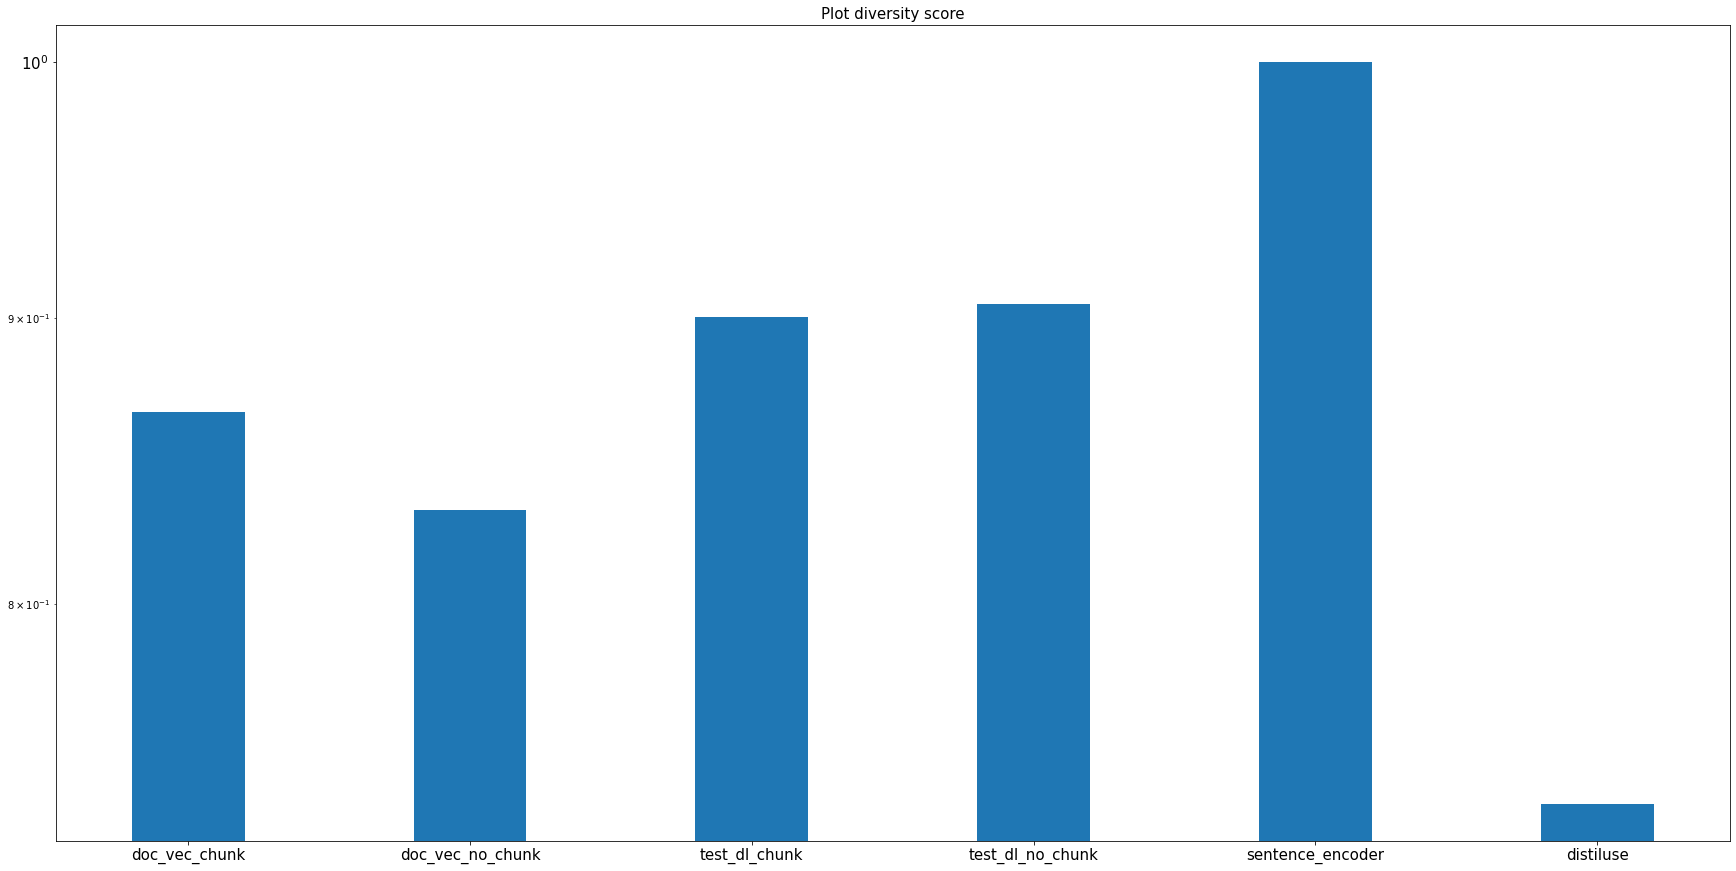

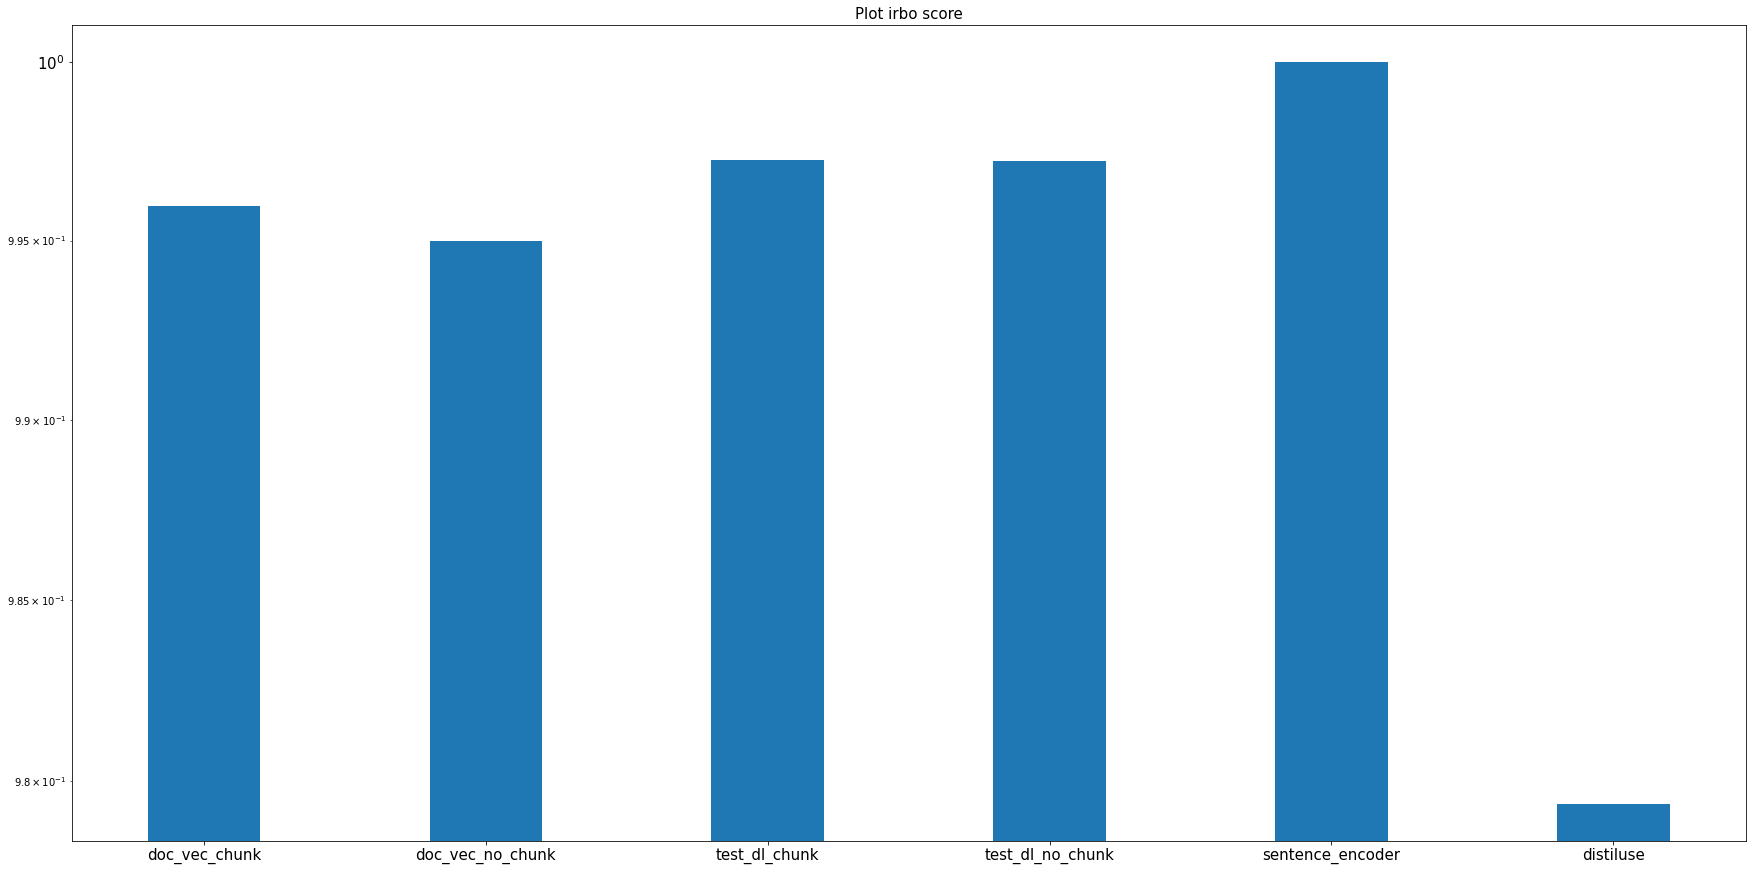

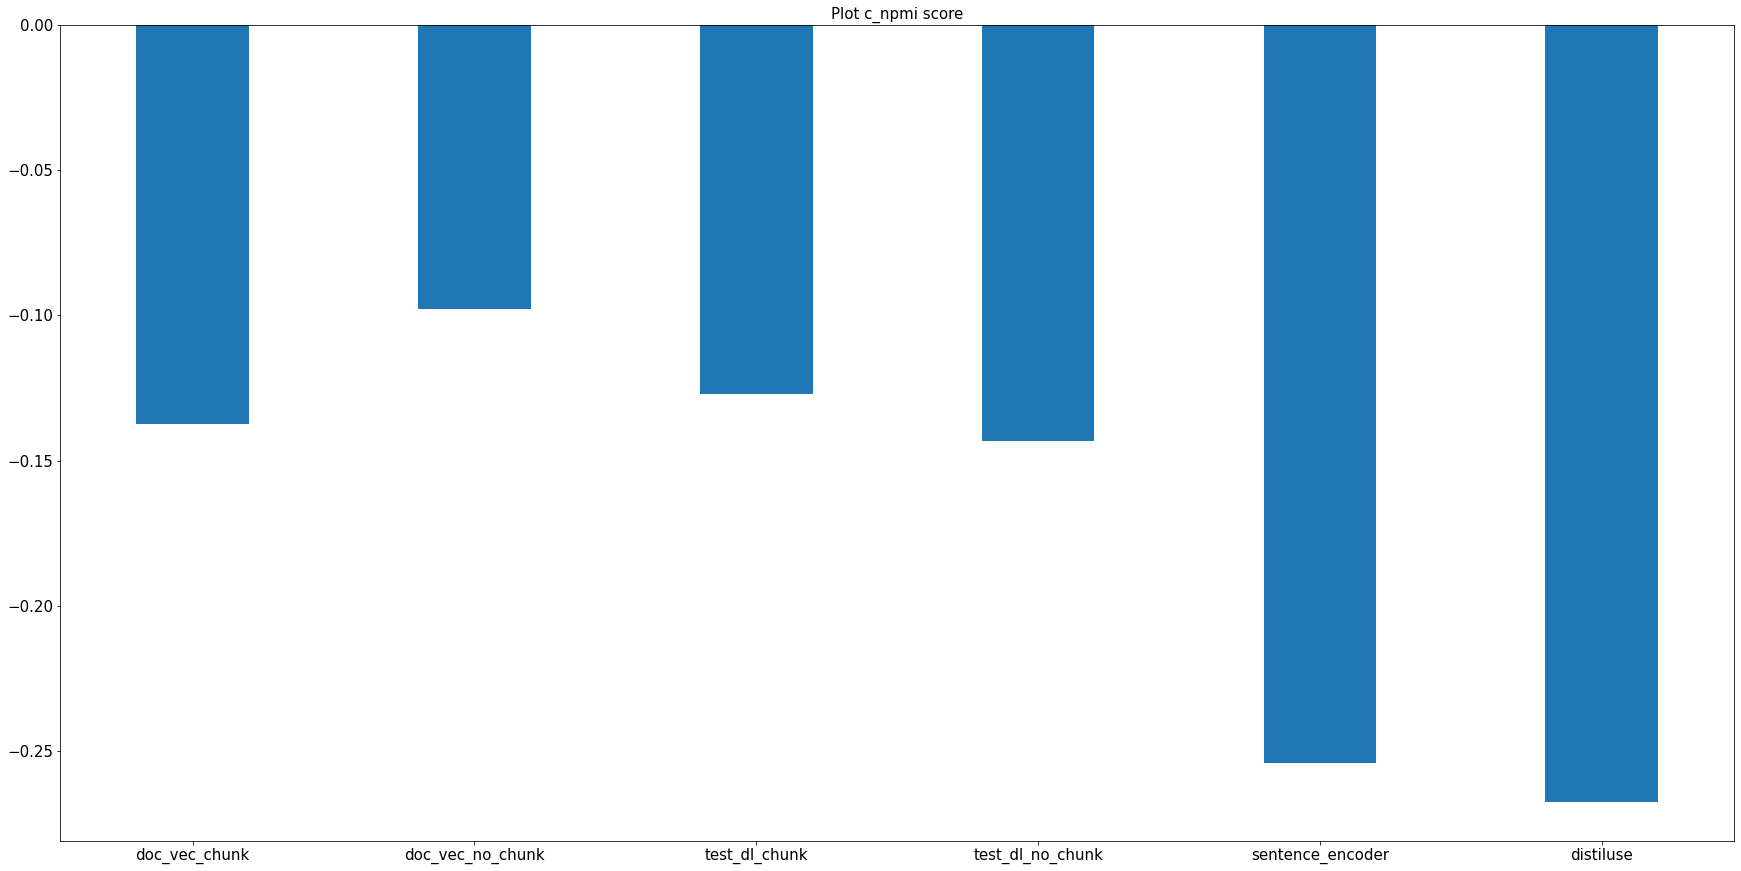

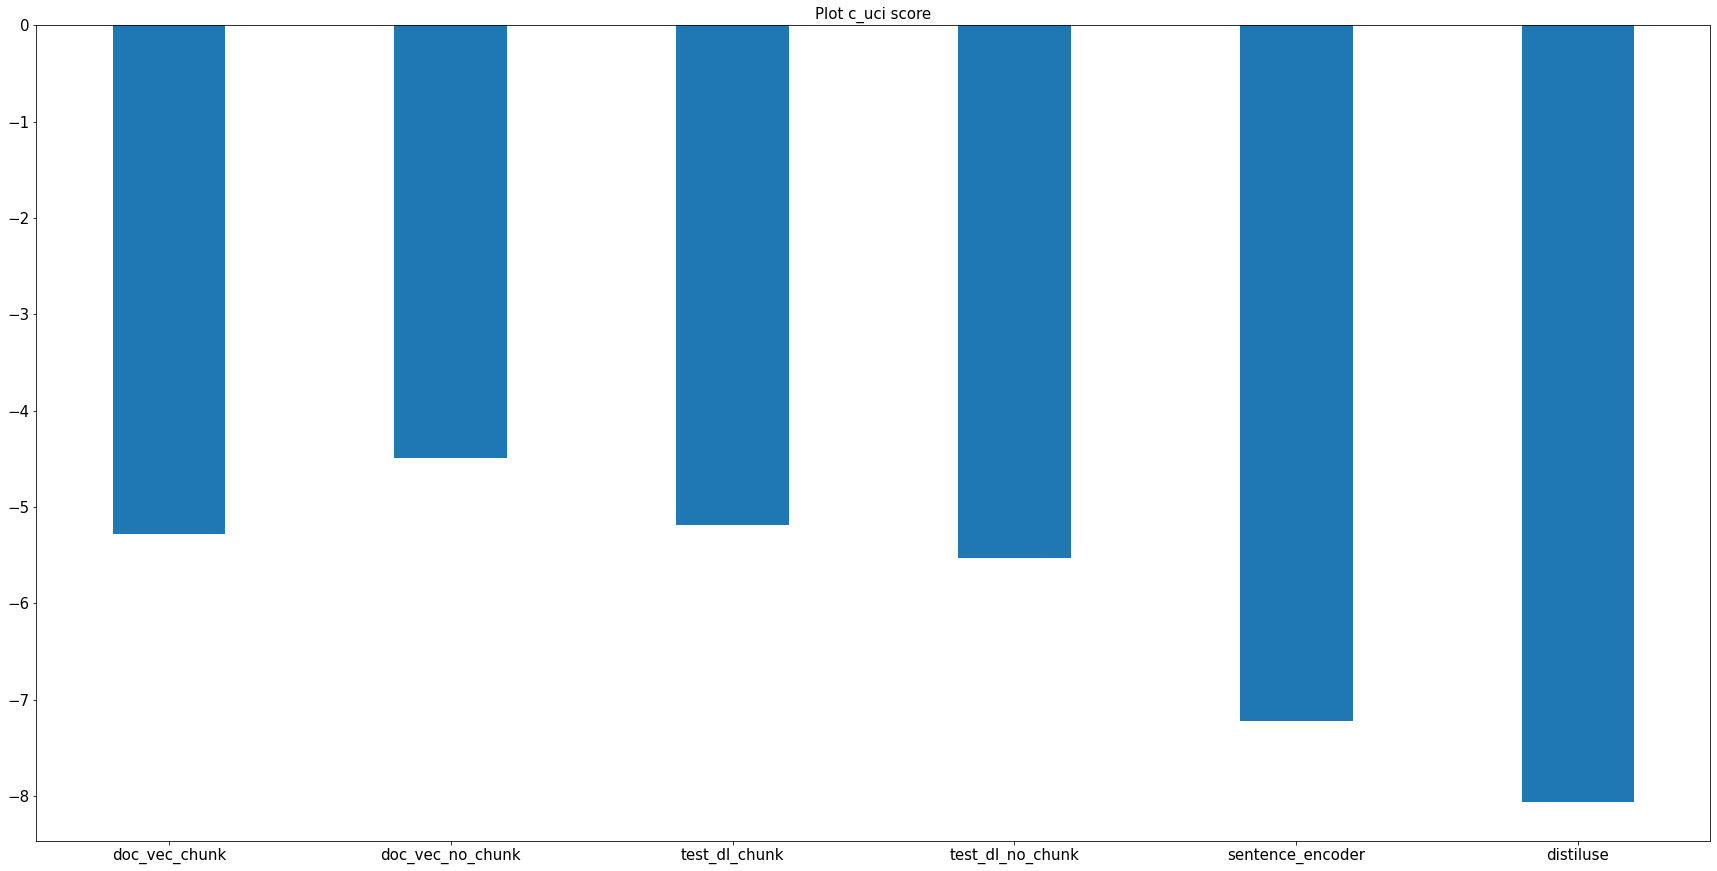

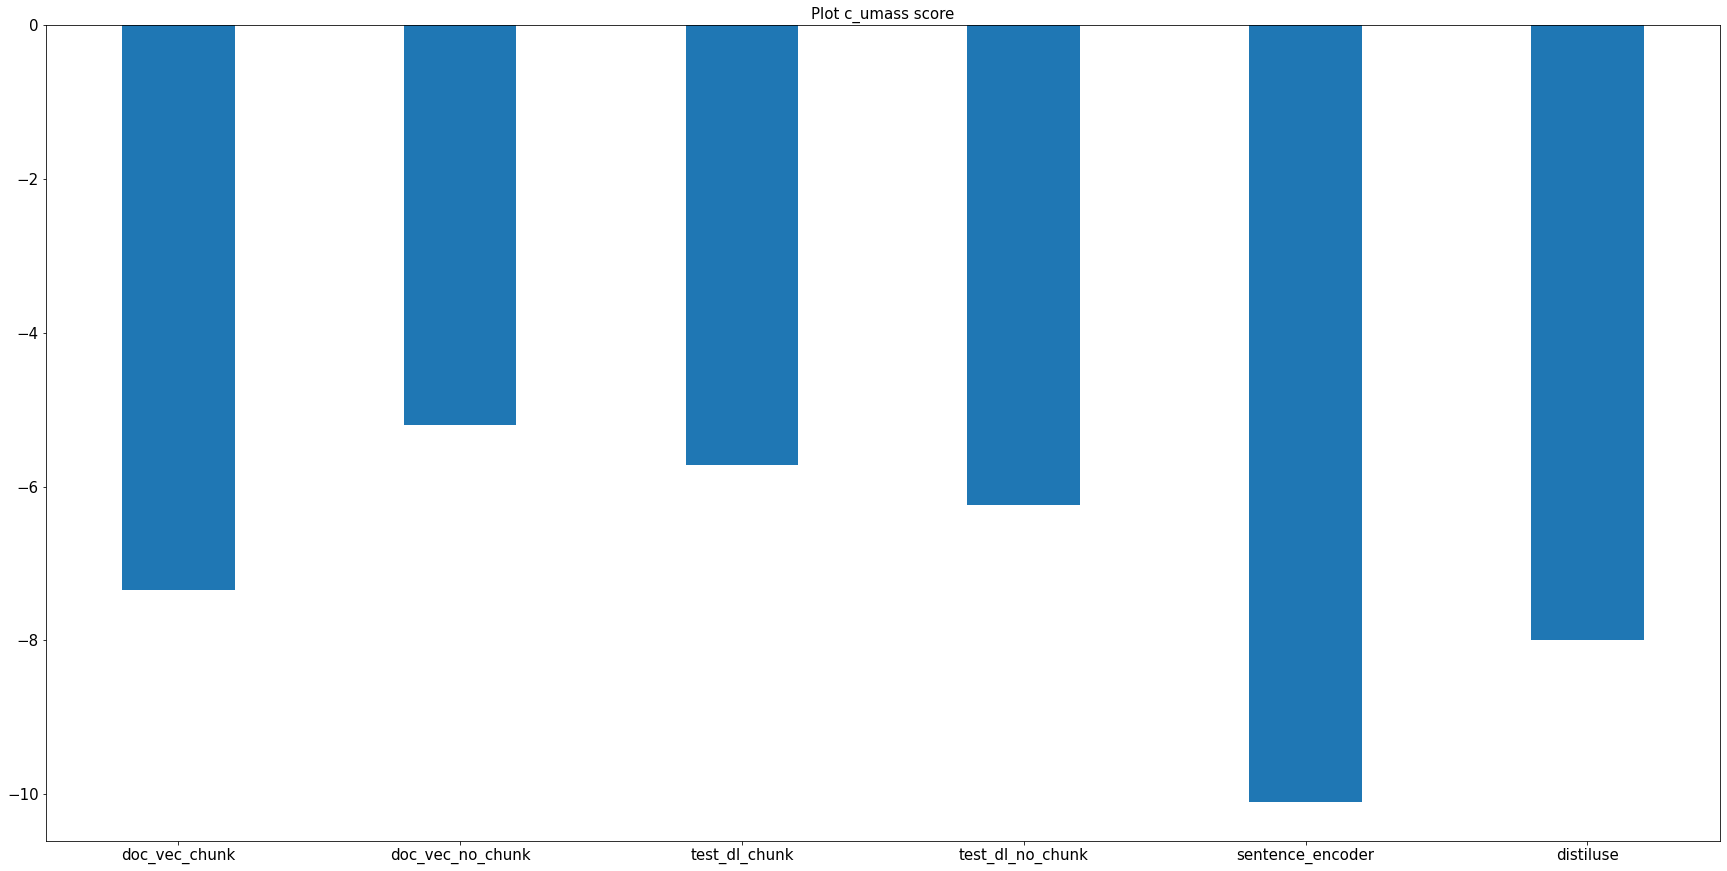

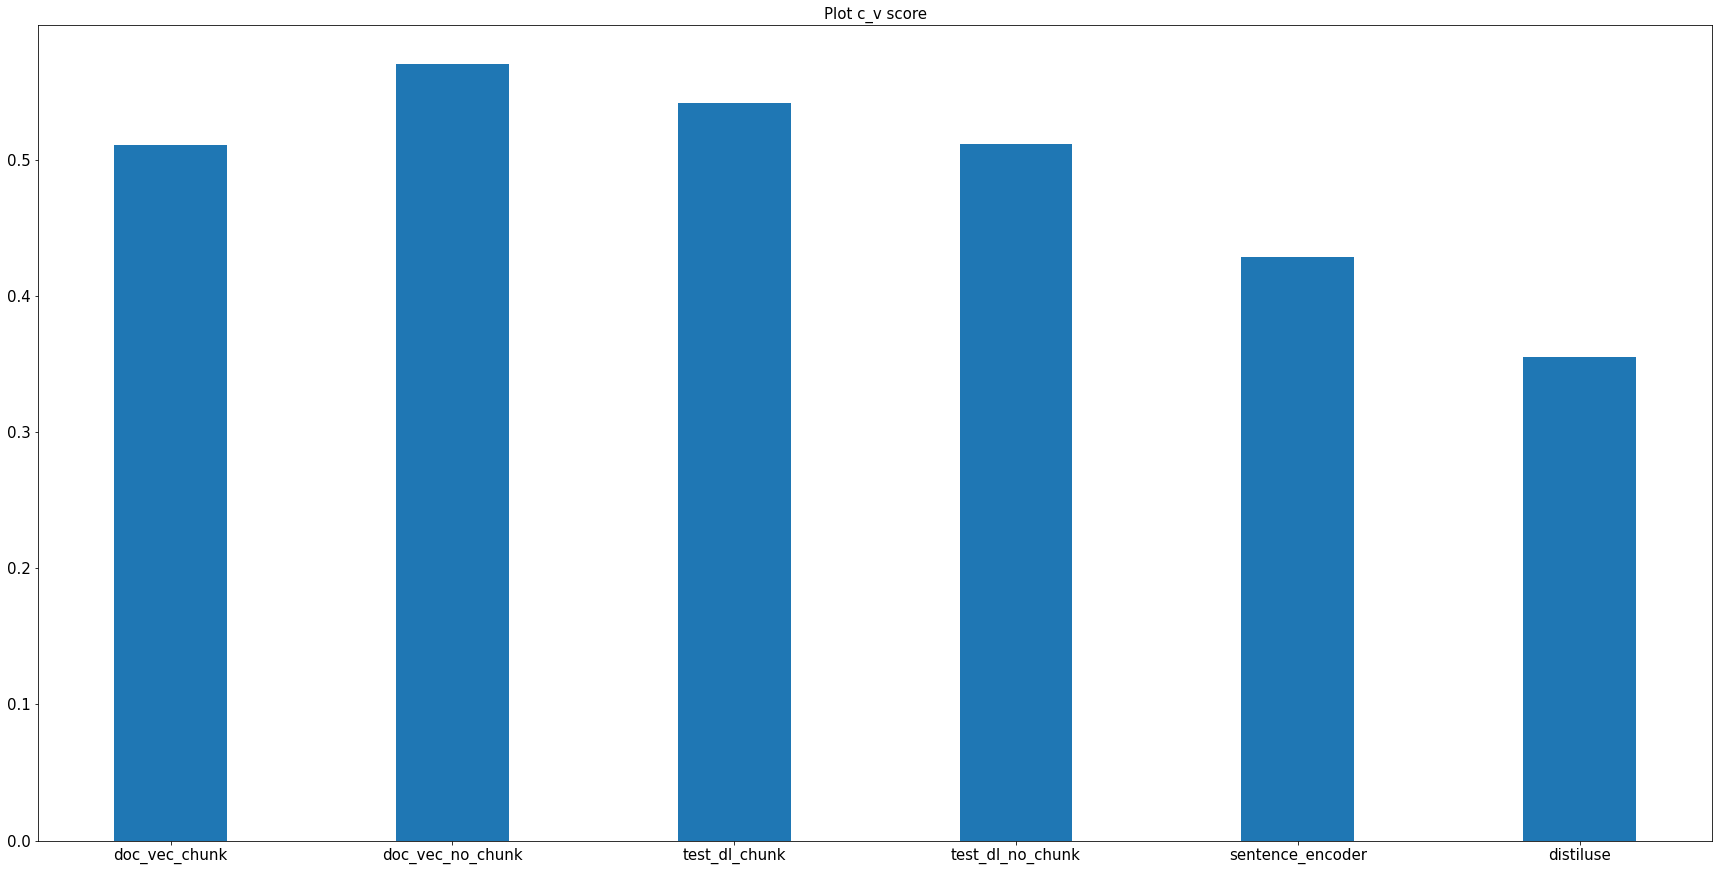

In [ ]:
metrics = ["diversity", "irbo", "c_npmi", "c_uci", "c_umass", "c_v"]
tests_done = [doc_vec_chunk, doc_vec_no_chunk, test_dl_chunk, test_dl_no_chunk, sentence_encoder, distiluse]
test_str = ["doc_vec_chunk", "doc_vec_no_chunk", "test_dl_chunk", "test_dl_no_chunk", "sentence_encoder", "distiluse"]
print("Plot metric scores for Top2Vec model")

for i,m in enumerate(metrics):
  ypoints = []
  for k in tests_done:
    ypoints.append(k[m])
  fig, ax = plt.subplots(figsize=(30, 15))
  if m == "diversity" or m == "irbo":
    ax.bar(test_str, ypoints, label=ypoints, log=True, width=0.4)
  else:
    ax.bar(test_str, ypoints, label=ypoints, width=0.4)
  plt.yticks(fontsize=15)
  plt.xticks(fontsize=15)
  ax.set_title("Plot {} score".format(m), fontsize=15)
  ax.set_label("Versions tested of Top2Vec")
  #ax.set_ylabel("Metric score: {}".format(m))

  plt.show()
  fig.savefig(top2vec_plot_path+m+'.png')

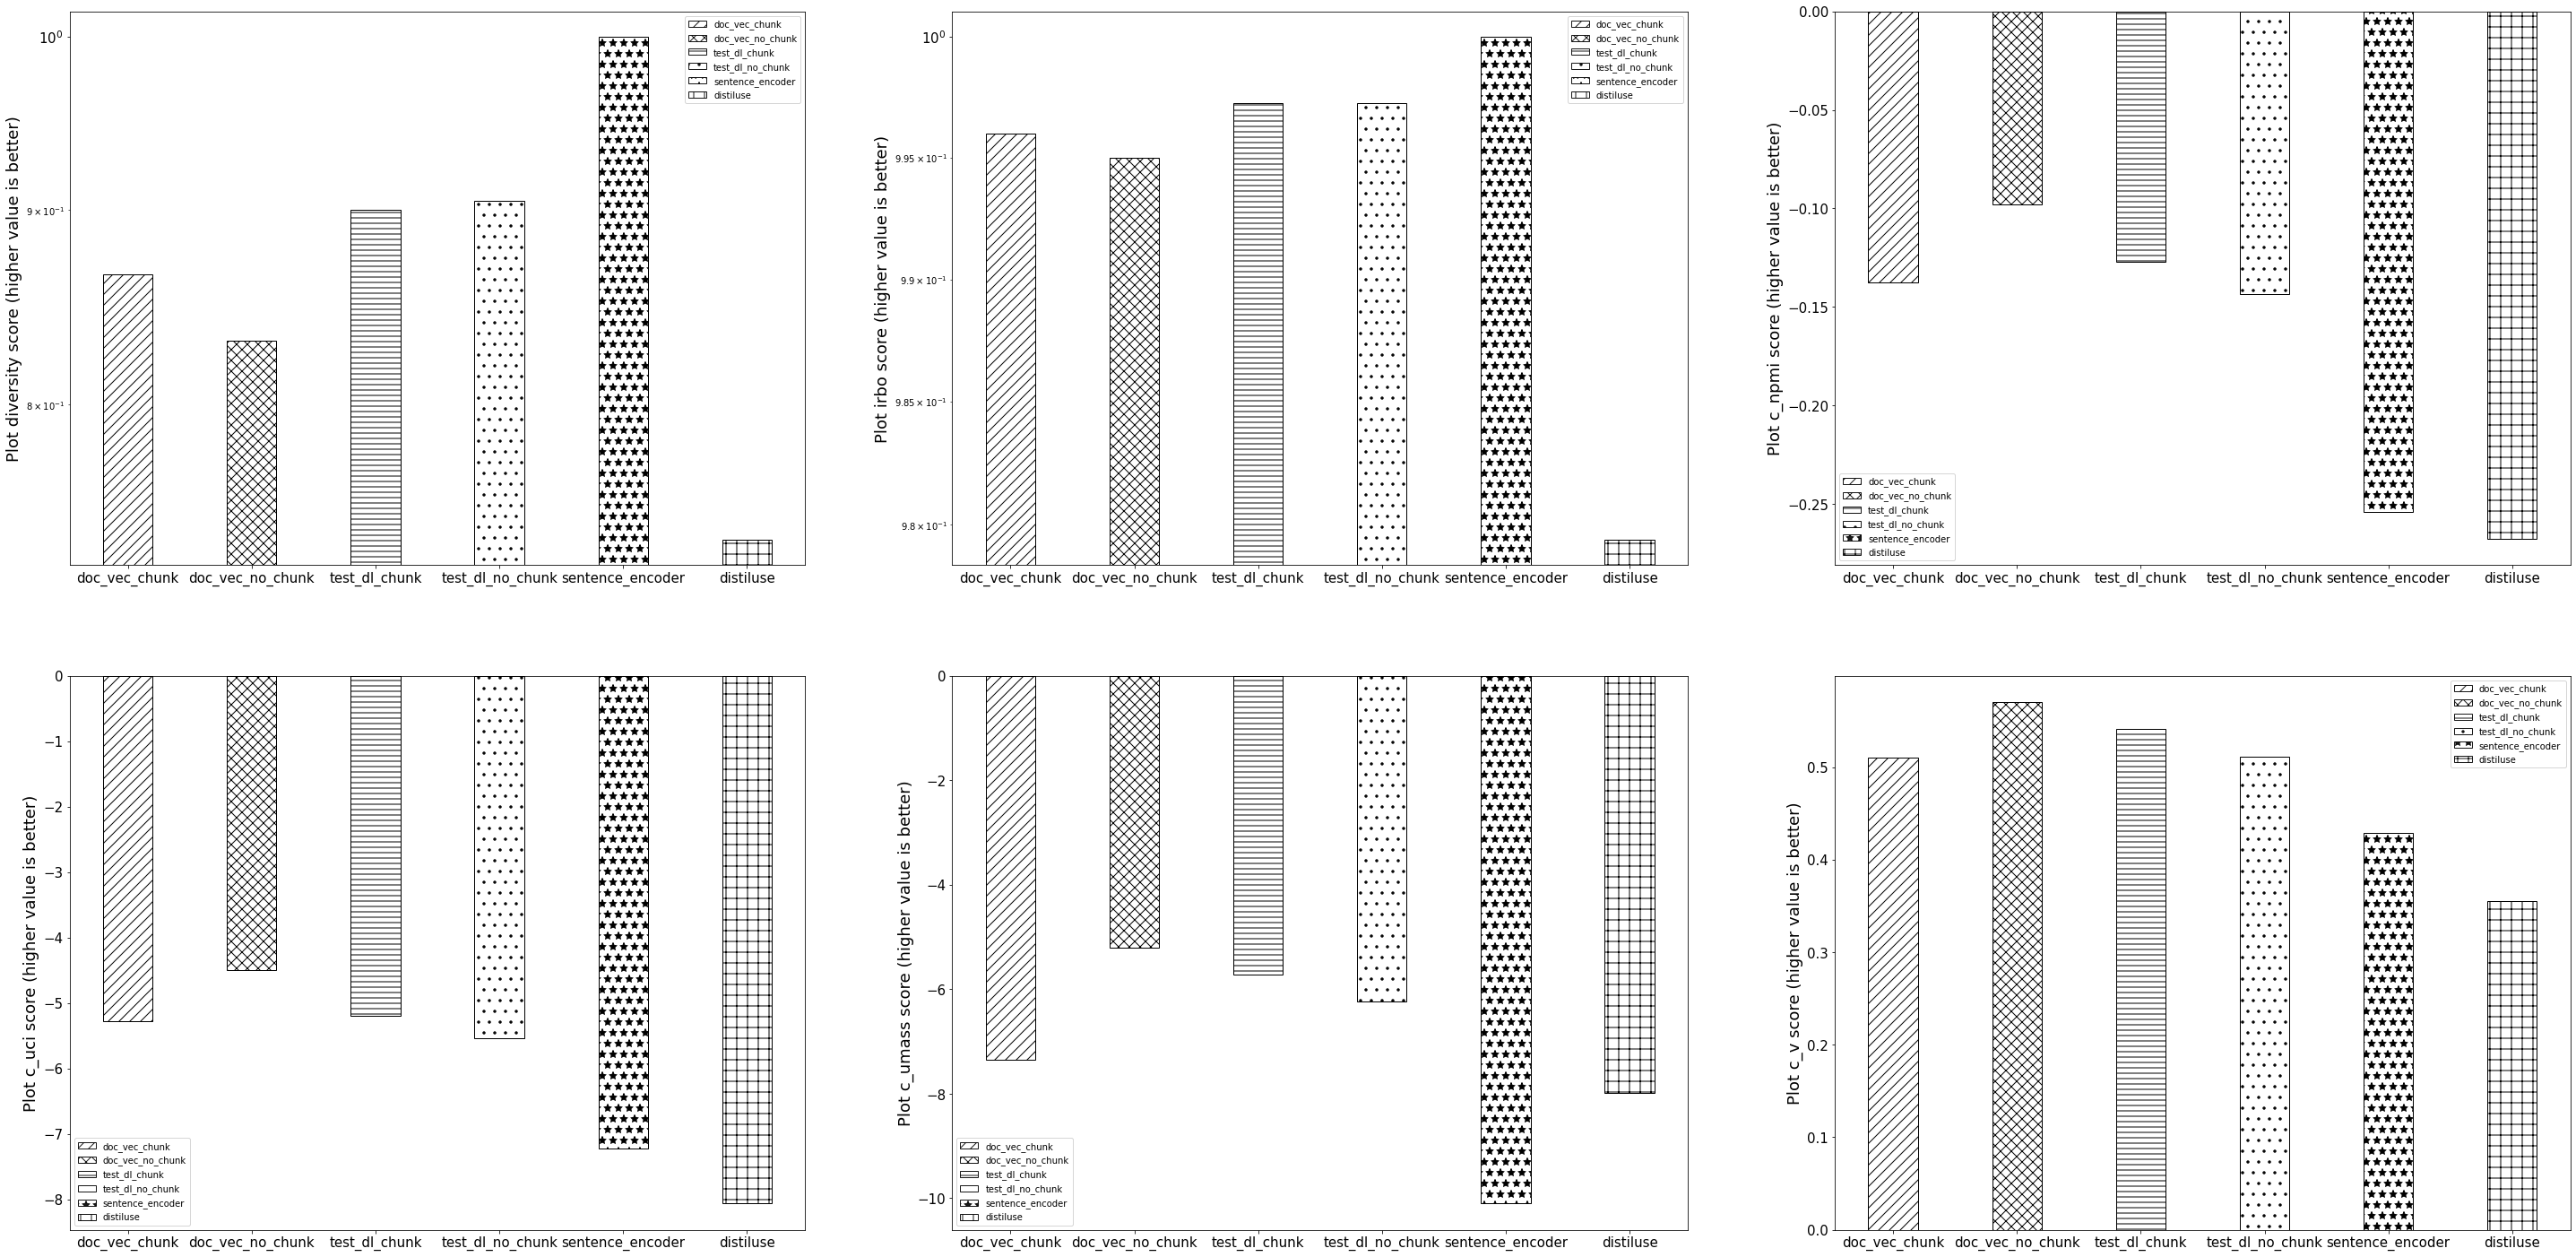

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(50,25))
pos = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]
hatches = ["//", "xx", "--", ".", "*", "+"]
legend_elements = []
for i in hatches:
  legend_elements.append(Patch(facecolor='w', edgecolor='black', alpha=0.9, hatch=i))

for i,m in enumerate(metrics):
  ypoints = []
  for k in tests_done:
    ypoints.append(k[m])
  p = pos[i]
  axs[p[0], p[1]].plot(figsize=(8, 4))
  if m == "diversity" or m == "irbo":
    bars = axs[p[0], p[1]].bar(test_str, ypoints, label=ypoints, log=True,  width=0.4)
  else:
    bars = axs[p[0], p[1]].bar(test_str, ypoints, label=ypoints,  width=0.4)
  
  for i in range(len(bars)):
    bars[i].set(hatch = hatches[i], fill=False)
  plt.sca(axs[p[0], p[1]])
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  axs[p[0], p[1]].set_ylabel("Plot {} score (higher value is better)".format(m), fontsize=18)
  #axs[p[0], p[1]].set_xlabel("Versions tested of Top2Vec", fontsize=18)
  #axs[p[0], p[1]].set_ylabel("Metric score".format(m))
  #print(hatches, type(hatches), test_str, type(test_str))
  axs[p[0], p[1]].legend(handles=legend_elements, labels=test_str)

fig.savefig(top2vec_plot_path+'all_metrics.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


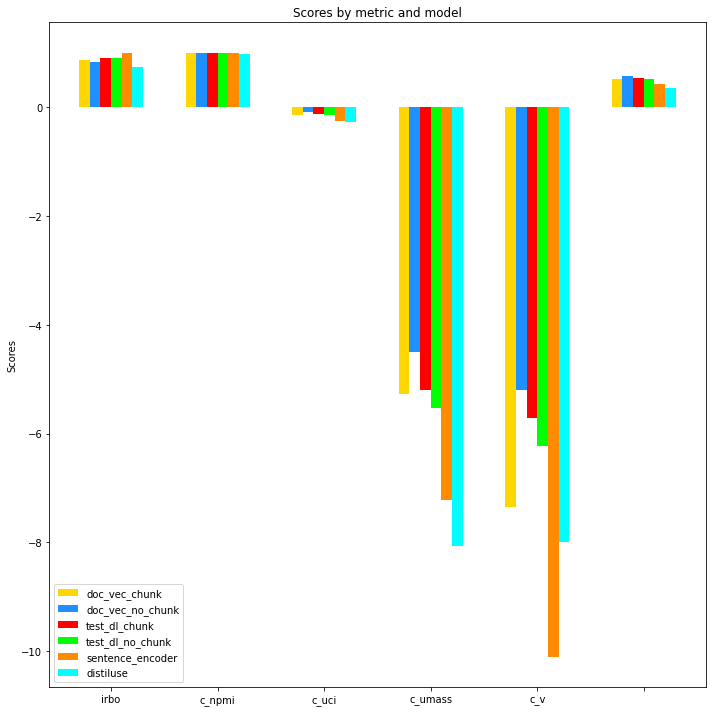

In [ ]:
labels = ["doc_vec_chunk", "doc_vec_no_chunk", "test_dl_chunk", "test_dl_no_chunk", "sentence_encoder", "distiluse"]
doc_vec_chunk_v = [doc_vec_chunk[m] for m in metrics]
doc_vec_no_chunk_v = [doc_vec_no_chunk[m] for m in metrics]
test_dl_chunk_v = [test_dl_chunk[m] for m in metrics] 
test_dl_no_chunk_v = [test_dl_no_chunk[m] for m in metrics]
sentence_encoder_v = [sentence_encoder[m] for m in metrics] 
distiluse_v = [distiluse[m] for m in metrics]
tests = [doc_vec_chunk_v, doc_vec_no_chunk_v, test_dl_chunk_v, test_dl_no_chunk_v, sentence_encoder_v, distiluse_v]

x = np.arange(len(labels))  # the label locations
width = 0.10  # the width of the bars
colors = ["gold", "dodgerblue", "red", "lime", "darkorange", "cyan"]
fig, ax = plt.subplots(figsize=(10, 10))

rects = []
for i,e in enumerate(tests):
  rects.append(ax.bar(x - (width*(2.5-i)), e, width, label=labels[i], color=colors[i])) #, log=True

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by metric and model')
ax.set_xticks(x, labels)
ax.legend()

for r in rects:
  ax.set_xticklabels(metrics)

fig.tight_layout()

plt.show()

In [ ]:
# for t,t_s in zip(tests_done, test_str):
#   print(t_s, t["num_topics"])

## Comparisons of the methods

In [72]:
results_path = "/content/drive/MyDrive/Tesi/results_csv/"

In [73]:
keys = ["dataset", "c_uci", "c_v",	"c_npmi",	"c_umass",	"topic_diversity", "#topics",	"irbo"]
metrics = ["topic_diversity", "irbo", "c_npmi", "c_uci", "c_umass", "c_v"]
models = ["LDA", "Top2Vec", "NMF", "BERTopic", "RoBERTa", "CTM", "ETM"]
datasets = ["ATE", "TAT", "ET", "20NG", "TP"]
data_dict = {"AirBnB":"ATE", "TripAdvisor":"TAT", "EasyTour":"ET", "20NewsGroup":"20NG", "TourPedia":"TP"}

In [74]:
results = dict()
csv_files = [(f,join(results_path, f)) for f in listdir(results_path) if isfile(join(results_path, f))]
datasets_from_csv = set()
for f in csv_files:
  reader = csv.reader(open(f[1], 'r'))
  next(reader, None)
  for m in models:
    if m in f[1]:
      results[m] = dict()
      break
  #results[f[0]] = dict()
  for row in reader:
    for k,v in zip(keys, row):
      if k != "dataset":
        results[m][dataset_csv][k] = float(v)
      else:
        results[m][data_dict[v]] = dict()
        dataset_csv = data_dict[v]
        datasets_from_csv.add(v)
  print("File: {} ... done".format(f[1]))

datasets_from_csv = list(datasets_from_csv)

File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - LDA.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - NMF.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - ETM.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - BERTopic Raw Data.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - RoBERTa Raw Data.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - Top2Vec Raw Data11.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - CTM.csv ... done


In [ ]:
#datasets_from_csv

In [ ]:
#results

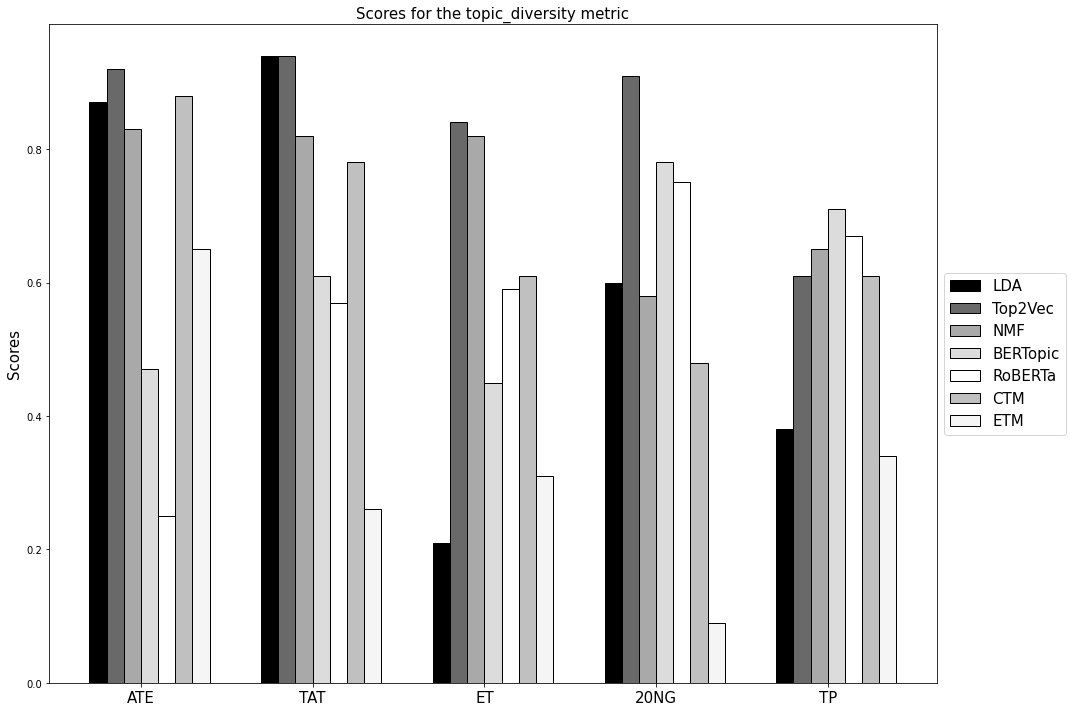

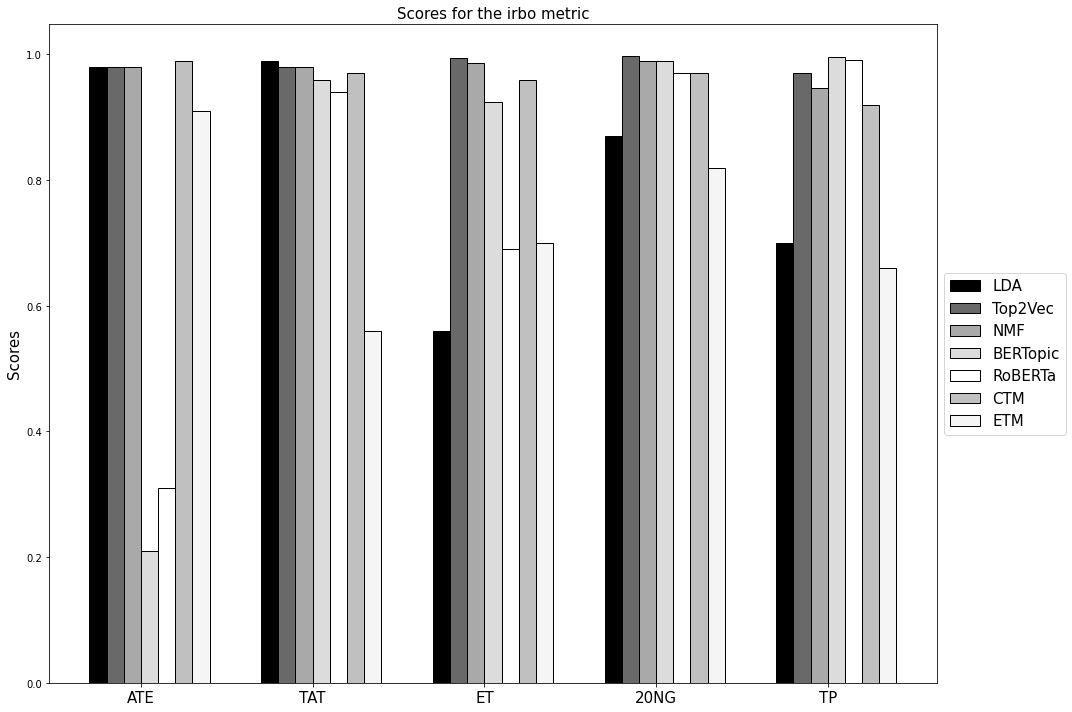

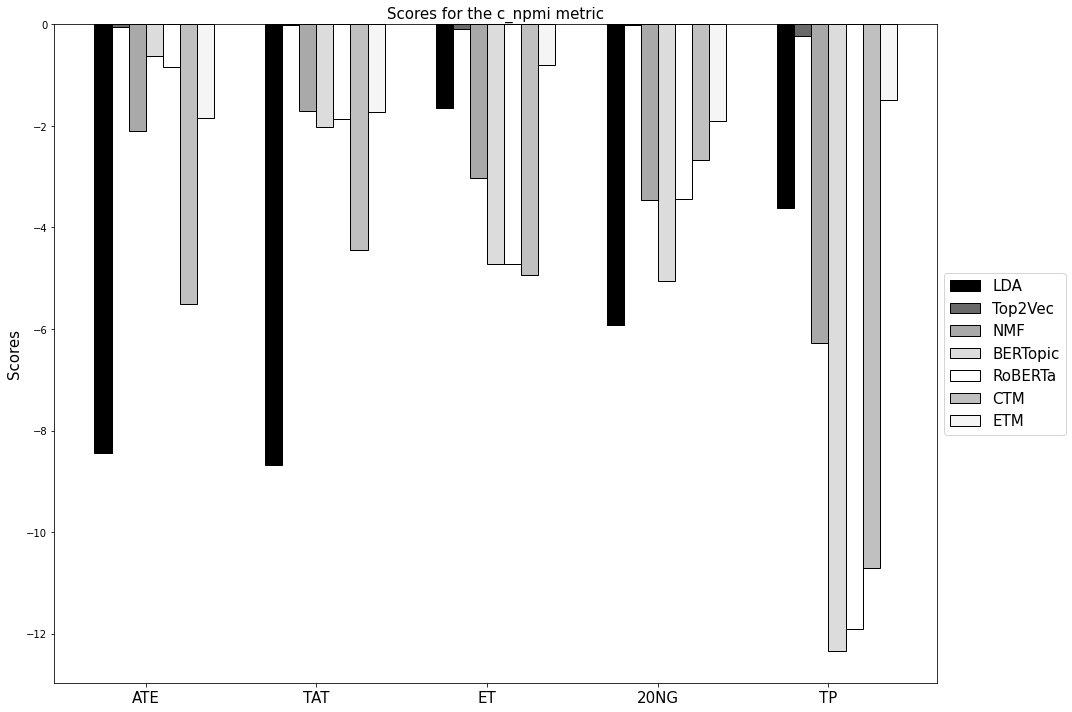

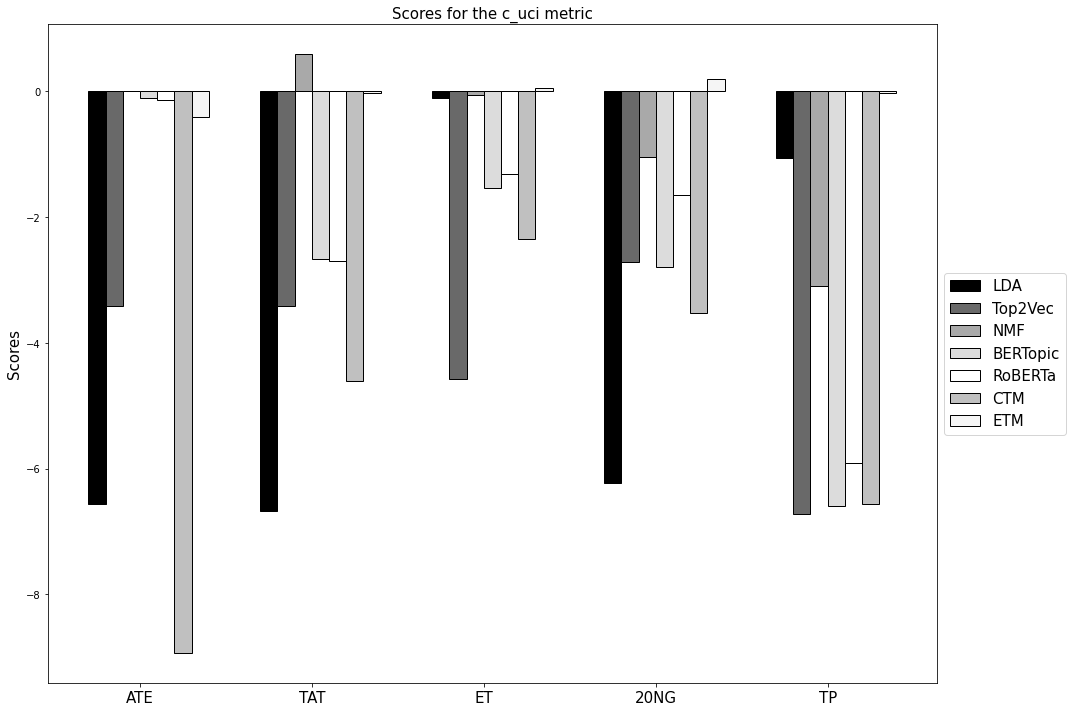

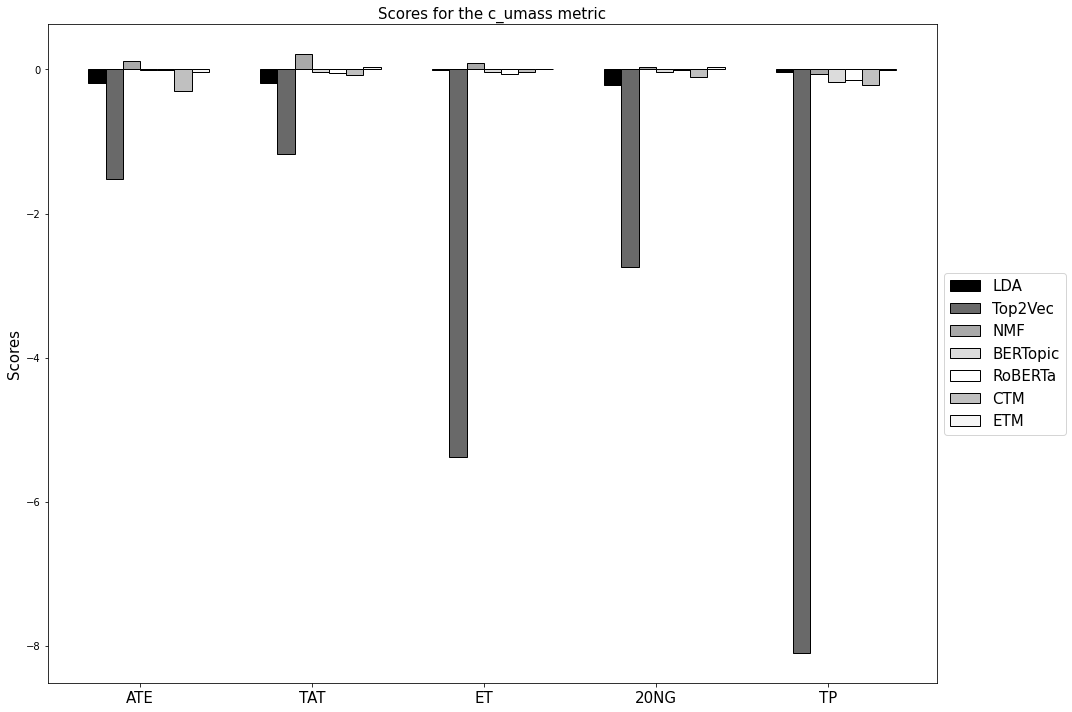

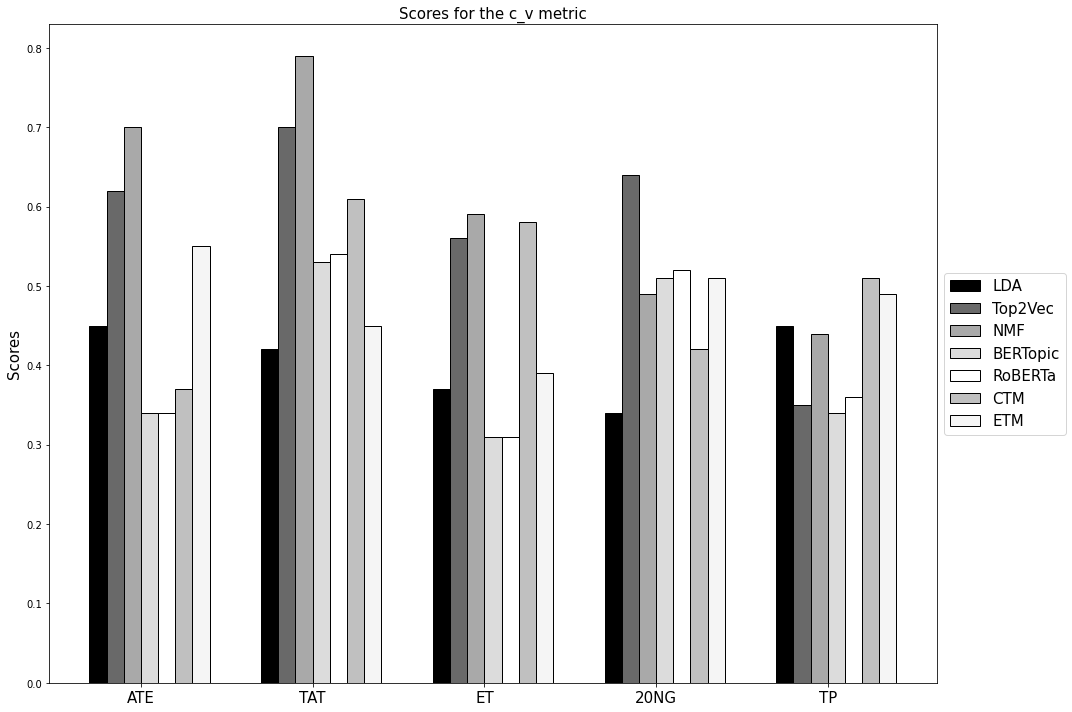

In [79]:
for m in metrics:
  x = np.arange(len(datasets)) 
  width = 0.10  
  colors = ["black", "dimgray", "darkgrey", "gainsboro", "white", "silver", "whitesmoke"]
  fig, ax = plt.subplots(figsize=(15, 10))

  tests = []
  for j in models:
    tests.append([results[j][d][m] for d in datasets])

  rects = []
  for i,e in enumerate(tests):
    rects.append(ax.bar(x - (width*(2.5-i)), e, width, label=models[i], color=colors[i], edgecolor="black")) #, log=True

  ax.set_ylabel('Scores', fontdict={"fontsize":15})
  ax.set_title('Scores for the {} metric'.format(m), fontdict={"fontsize":15})
  ax.set_xticks(x)
  # print(ax.get_yticks())
  # ax.set_xticks(ax.get_yticks())
  # print(ax.get_yticks())
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)

  for d in datasets:
    ax.set_xticklabels(datasets, fontdict={"fontsize":15})

  # for d in datasets:
  #   ax.set_yticklabels(ax.get_yticks(), fontdict={"fontsize":15})

  # for i, d in enumerate(zip(tests, ax.get_xticks())):
  #   for j, v in enumerate(d[0]):
  #     ax.text(x=d[1]-(width*(2.5-j)), y=rects[i][j].get_height(), s=str(v))

  fig.tight_layout()

  plt.show()
  fig.savefig(plot_path+m+'.png')